In [1]:
from matminer.datasets import get_available_datasets
get_available_datasets()

boltztrap_mp: Effective mass and thermoelectric properties of 8924 compounds in The  Materials Project database that are calculated by the BoltzTraP software package run on the GGA-PBE or GGA+U density functional theory calculation results. The properties are reported at the temperature of 300 Kelvin and the carrier concentration of 1e18 1/cm3.

brgoch_superhard_training: 2574 materials used for training regressors that predict shear and bulk modulus.

castelli_perovskites: 18,928 perovskites generated with ABX combinatorics, calculating gllbsc band gap and pbe structure, and also reporting absolute band edge positions and heat of formation.

citrine_thermal_conductivity: Thermal conductivity of 872 compounds measured experimentally and retrieved from Citrine database from various references. The reported values are measured at various temperatures of which 295 are at room temperature.

dielectric_constant: 1,056 structures with dielectric properties, calculated with DFPT-PBE.

double_

['boltztrap_mp',
 'brgoch_superhard_training',
 'castelli_perovskites',
 'citrine_thermal_conductivity',
 'dielectric_constant',
 'double_perovskites_gap',
 'double_perovskites_gap_lumo',
 'elastic_tensor_2015',
 'expt_formation_enthalpy',
 'expt_formation_enthalpy_kingsbury',
 'expt_gap',
 'expt_gap_kingsbury',
 'flla',
 'glass_binary',
 'glass_binary_v2',
 'glass_ternary_hipt',
 'glass_ternary_landolt',
 'heusler_magnetic',
 'jarvis_dft_2d',
 'jarvis_dft_3d',
 'jarvis_ml_dft_training',
 'm2ax',
 'matbench_dielectric',
 'matbench_expt_gap',
 'matbench_expt_is_metal',
 'matbench_glass',
 'matbench_jdft2d',
 'matbench_log_gvrh',
 'matbench_log_kvrh',
 'matbench_mp_e_form',
 'matbench_mp_gap',
 'matbench_mp_is_metal',
 'matbench_perovskites',
 'matbench_phonons',
 'matbench_steels',
 'mp_all_20181018',
 'mp_nostruct_20181018',
 'phonon_dielectric_mp',
 'piezoelectric_tensor',
 'ricci_boltztrap_mp_tabular',
 'steel_strength',
 'superconductivity2018',
 'tholander_nitrides',
 'ucsb_thermoe

In [2]:
import json 
import pandas as pd 

json_file_path = '/home/ash/ML_Material_science/test_2/Band_gap_prediction/expt_gap.json'

with open(json_file_path,mode='r') as json_file : 
    data = json.load(json_file)

index = data['index']
columns = data['columns']
data_values = data['data']

df = pd.DataFrame(data_values, index=index , columns=columns)

In [3]:
df.head()

,formula,gap expt
0,Hg0.7Cd0.3Te,0.35
1,CuBr,3.08
2,LuP,1.30
3,Cu3SbSe4,0.40
4,ZnO,3.44


In [4]:
from matminer.datasets import get_all_dataset_info
print(get_all_dataset_info('expt_gap'))

Dataset: expt_gap
Description: Experimental band gap of 6354 inorganic semiconductors.
Columns:
	formula: chemical formula
	gap expt: band gap (in eV) measured experimentally
Num Entries: 6354
Reference: https://pubs.acs.org/doi/suppl/10.1021/acs.jpclett.8b00124
Bibtex citations: ['@article{doi:10.1021/acs.jpclett.8b00124,\nauthor = {Zhuo, Ya and Mansouri Tehrani, Aria and Brgoch, Jakoah},\ntitle = {Predicting the Band Gaps of Inorganic Solids by Machine Learning},\njournal = {The Journal of Physical Chemistry Letters},\nvolume = {9},\nnumber = {7},\npages = {1668-1673},\nyear = {2018},\ndoi = {10.1021/acs.jpclett.8b00124},\nnote ={PMID: 29532658},\neprint = {\nhttps://doi.org/10.1021/acs.jpclett.8b00124\n\n}}']
File type: json.gz
Figshare URL: https://ndownloader.figshare.com/files/13464434
SHA256 Hash Digest: 2d0980e3533c1ba6ad6e392a88f08cfcf2d311d4b7fe6eb0b0c8e876211dfda3




In [5]:
df.describe()

,gap expt
count,6354.000000
mean,1.252225
std,1.539961
min,0.000000
25%,0.000000
50%,0.710000
75%,2.130000
max,11.700000


In [6]:
from matminer.featurizers.conversions import StrToComposition

str = StrToComposition()
df = str.featurize_dataframe(df,'formula')

/home/ash/miniconda3/envs/py3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
StrToComposition: 100%|██████████| 6354/6354 [00:01<00:00, 5217.25it/s] 



In [7]:
df.head()

,formula,gap expt,composition
0,Hg0.7Cd0.3Te,0.35,"(Hg, Cd, Te)"
1,CuBr,3.08,"(Cu, Br)"
2,LuP,1.30,"(Lu, P)"
3,Cu3SbSe4,0.40,"(Cu, Sb, Se)"
4,ZnO,3.44,"(Zn, O)"


In [8]:
'''from matminer.featurizers.composition import ElementFraction

ef = ElementFraction()
df = ef.featurize_dataframe(df, 'composition',ignore_errors=True)
df.head()'''

"from matminer.featurizers.composition import ElementFraction\n\nef = ElementFraction()\ndf = ef.featurize_dataframe(df, 'composition',ignore_errors=True)\ndf.head()"

In [9]:
from matminer.featurizers.composition import ElementProperty

featurizer = ElementProperty.from_preset('magpie')
bg_data_featurized = featurizer.featurize_dataframe(df, 'composition',ignore_errors=True)
bg_data_featurized.head() 

ElementProperty: 100%|██████████| 6354/6354 [00:08<00:00, 729.15it/s]


,formula,gap expt,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,Hg0.7Cd0.3Te,0.35,"(Hg, Cd, Te)",48.0,80.0,32.0,61.20,13.1600,52.0,70.0,...,0.000000,0.000000,0.000000,0.0,152.0,194.0,42.0,163.200,11.200,152.0
1,CuBr,3.08,"(Cu, Br)",29.0,35.0,6.0,32.00,3.0000,29.0,64.0,...,0.000000,0.000000,0.000000,0.0,64.0,225.0,161.0,144.500,80.500,64.0
2,LuP,1.30,"(Lu, P)",15.0,71.0,56.0,43.00,28.0000,15.0,41.0,...,0.002247,0.001124,0.001124,0.0,2.0,194.0,192.0,98.000,96.000,2.0
3,Cu3SbSe4,0.40,"(Cu, Sb, Se)",29.0,51.0,22.0,34.25,4.1875,34.0,64.0,...,0.000000,0.000000,0.000000,0.0,14.0,225.0,211.0,112.125,98.125,14.0
4,ZnO,3.44,"(Zn, O)",8.0,30.0,22.0,19.00,11.0000,8.0,69.0,...,0.000000,0.000000,0.000000,0.0,12.0,194.0,182.0,103.000,91.000,12.0


In [10]:
bg_data = bg_data_featurized[bg_data_featurized['gap expt'] > 0].reset_index(drop=True)
display(bg_data.head())
bg_data
y = bg_data['gap expt']

,formula,gap expt,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,Hg0.7Cd0.3Te,0.35,"(Hg, Cd, Te)",48.0,80.0,32.0,61.20,13.1600,52.0,70.0,...,0.000000,0.000000,0.000000,0.0,152.0,194.0,42.0,163.200,11.200,152.0
1,CuBr,3.08,"(Cu, Br)",29.0,35.0,6.0,32.00,3.0000,29.0,64.0,...,0.000000,0.000000,0.000000,0.0,64.0,225.0,161.0,144.500,80.500,64.0
2,LuP,1.30,"(Lu, P)",15.0,71.0,56.0,43.00,28.0000,15.0,41.0,...,0.002247,0.001124,0.001124,0.0,2.0,194.0,192.0,98.000,96.000,2.0
3,Cu3SbSe4,0.40,"(Cu, Sb, Se)",29.0,51.0,22.0,34.25,4.1875,34.0,64.0,...,0.000000,0.000000,0.000000,0.0,14.0,225.0,211.0,112.125,98.125,14.0
4,ZnO,3.44,"(Zn, O)",8.0,30.0,22.0,19.00,11.0000,8.0,69.0,...,0.000000,0.000000,0.000000,0.0,12.0,194.0,182.0,103.000,91.000,12.0


In [11]:
import matplotlib.pyplot as plt
bg_data = bg_data.dropna(how='any',axis=0)
bg_data.head()

,formula,gap expt,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,Hg0.7Cd0.3Te,0.35,"(Hg, Cd, Te)",48.0,80.0,32.0,61.20,13.1600,52.0,70.0,...,0.000000,0.000000,0.000000,0.0,152.0,194.0,42.0,163.200,11.200,152.0
1,CuBr,3.08,"(Cu, Br)",29.0,35.0,6.0,32.00,3.0000,29.0,64.0,...,0.000000,0.000000,0.000000,0.0,64.0,225.0,161.0,144.500,80.500,64.0
2,LuP,1.30,"(Lu, P)",15.0,71.0,56.0,43.00,28.0000,15.0,41.0,...,0.002247,0.001124,0.001124,0.0,2.0,194.0,192.0,98.000,96.000,2.0
3,Cu3SbSe4,0.40,"(Cu, Sb, Se)",29.0,51.0,22.0,34.25,4.1875,34.0,64.0,...,0.000000,0.000000,0.000000,0.0,14.0,225.0,211.0,112.125,98.125,14.0
4,ZnO,3.44,"(Zn, O)",8.0,30.0,22.0,19.00,11.0000,8.0,69.0,...,0.000000,0.000000,0.000000,0.0,12.0,194.0,182.0,103.000,91.000,12.0


/tmp/ipykernel_27555/784451059.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = bg_data.corr().abs()


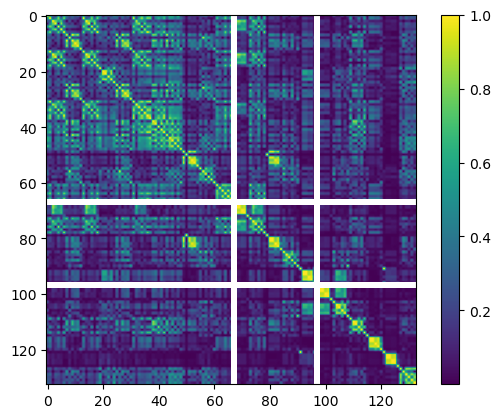

In [12]:
corr_matrix = bg_data.corr().abs()
fig, ax = plt.subplots()
h = ax.imshow(corr_matrix)
plt.colorbar(h)
plt.show()

In [13]:
import numpy as np 
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper_tri.columns if any(upper_tri[column]>0.95)]
to_drop += list(bg_data.columns[bg_data.isin([0]).sum() > 100])

bg_data_cleaned = bg_data.drop(to_drop, axis=1)
display(bg_data_cleaned)

,formula,gap expt,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,...,MagpieData maximum GSvolume_pa,MagpieData mean GSvolume_pa,MagpieData avg_dev GSvolume_pa,MagpieData mode GSvolume_pa,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,Hg0.7Cd0.3Te,0.35,"(Hg, Cd, Te)",48.0,80.0,32.0,61.20,13.1600,52.0,70.0,...,34.763333,29.139072,5.624261,34.763333,152.0,194.0,42.0,163.200,11.200,152.0
1,CuBr,3.08,"(Cu, Br)",29.0,35.0,6.0,32.00,3.0000,29.0,64.0,...,29.480000,20.275000,9.205000,11.070000,64.0,225.0,161.0,144.500,80.500,64.0
2,LuP,1.30,"(Lu, P)",15.0,71.0,56.0,43.00,28.0000,15.0,41.0,...,28.865000,25.717619,3.147381,22.570238,2.0,194.0,192.0,98.000,96.000,2.0
3,Cu3SbSe4,0.40,"(Cu, Sb, Se)",29.0,51.0,22.0,34.25,4.1875,34.0,64.0,...,31.560000,21.056250,7.489688,25.920000,14.0,225.0,211.0,112.125,98.125,14.0
4,ZnO,3.44,"(Zn, O)",8.0,30.0,22.0,19.00,11.0000,8.0,69.0,...,13.960000,11.532500,2.427500,9.105000,12.0,194.0,182.0,103.000,91.000,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3891,ZnTe,2.25,"(Zn, Te)",30.0,52.0,22.0,41.00,11.0000,30.0,69.0,...,34.763333,24.361667,10.401667,13.960000,152.0,194.0,42.0,173.000,21.000,152.0
3892,ZnTe,2.29,"(Zn, Te)",30.0,52.0,22.0,41.00,11.0000,30.0,69.0,...,34.763333,24.361667,10.401667,13.960000,152.0,194.0,42.0,173.000,21.000,152.0
3893,ZnSe,2.76,"(Zn, Se)",30.0,34.0,4.0,32.00,2.0000,30.0,69.0,...,25.920000,19.940000,5.980000,13.960000,14.0,194.0,180.0,104.000,90.000,14.0
3894,ZnSnP2,1.66,"(Zn, Sn, P)",15.0,50.0,35.0,27.50,12.5000,15.0,69.0,...,33.285000,23.096369,5.094315,22.570238,2.0,194.0,192.0,84.750,82.750,2.0


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error , mean_absolute_error
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

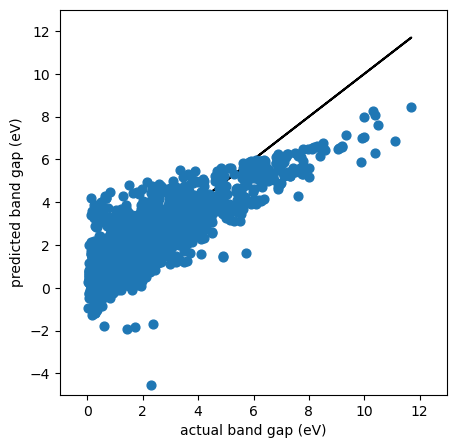

In [15]:
Lr = LinearRegression()
Kfold = KFold(n_splits=5, shuffle=True)
scaler = StandardScaler()

X = bg_data_cleaned.loc[:,featurizer.feature_labels()[0]:]
X_scaled = scaler.fit_transform(X)
y = bg_data_cleaned['gap expt']

yhat = cross_val_predict(Lr,X_scaled,y, cv=Kfold)

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(y,yhat, s=40)
ax.plot(y, y , c='k', zorder=-5)
ax.set_xlabel("actual band gap (eV)")
ax.set_ylabel("predicted band gap (eV)")
ax.set_xlim(-1,13)
ax.set_ylim(-5,13)
plt.show()

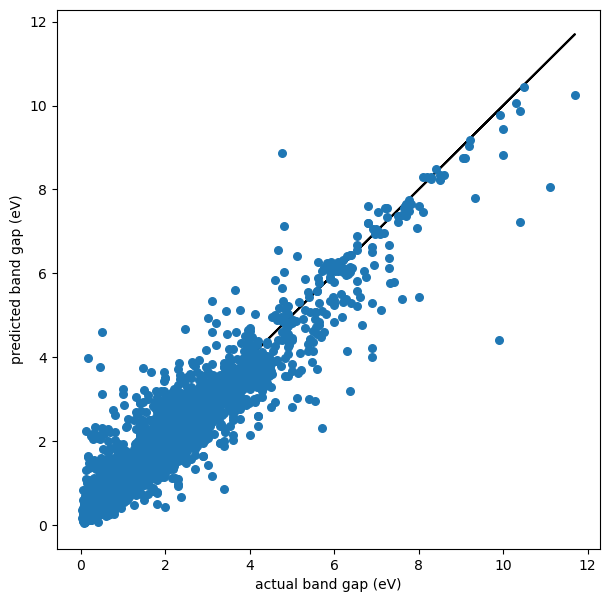

In [16]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
kfold = KFold(n_splits=5, shuffle=True , random_state=0)
y_hat = cross_val_predict(rf, X, y, cv=kfold)

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(y, y_hat, s=30)
ax.plot(y, y, 'k', zorder=-5)
ax.set_xlabel('actual band gap (eV)')
ax.set_ylabel('predicted band gap (eV)')
plt.show()

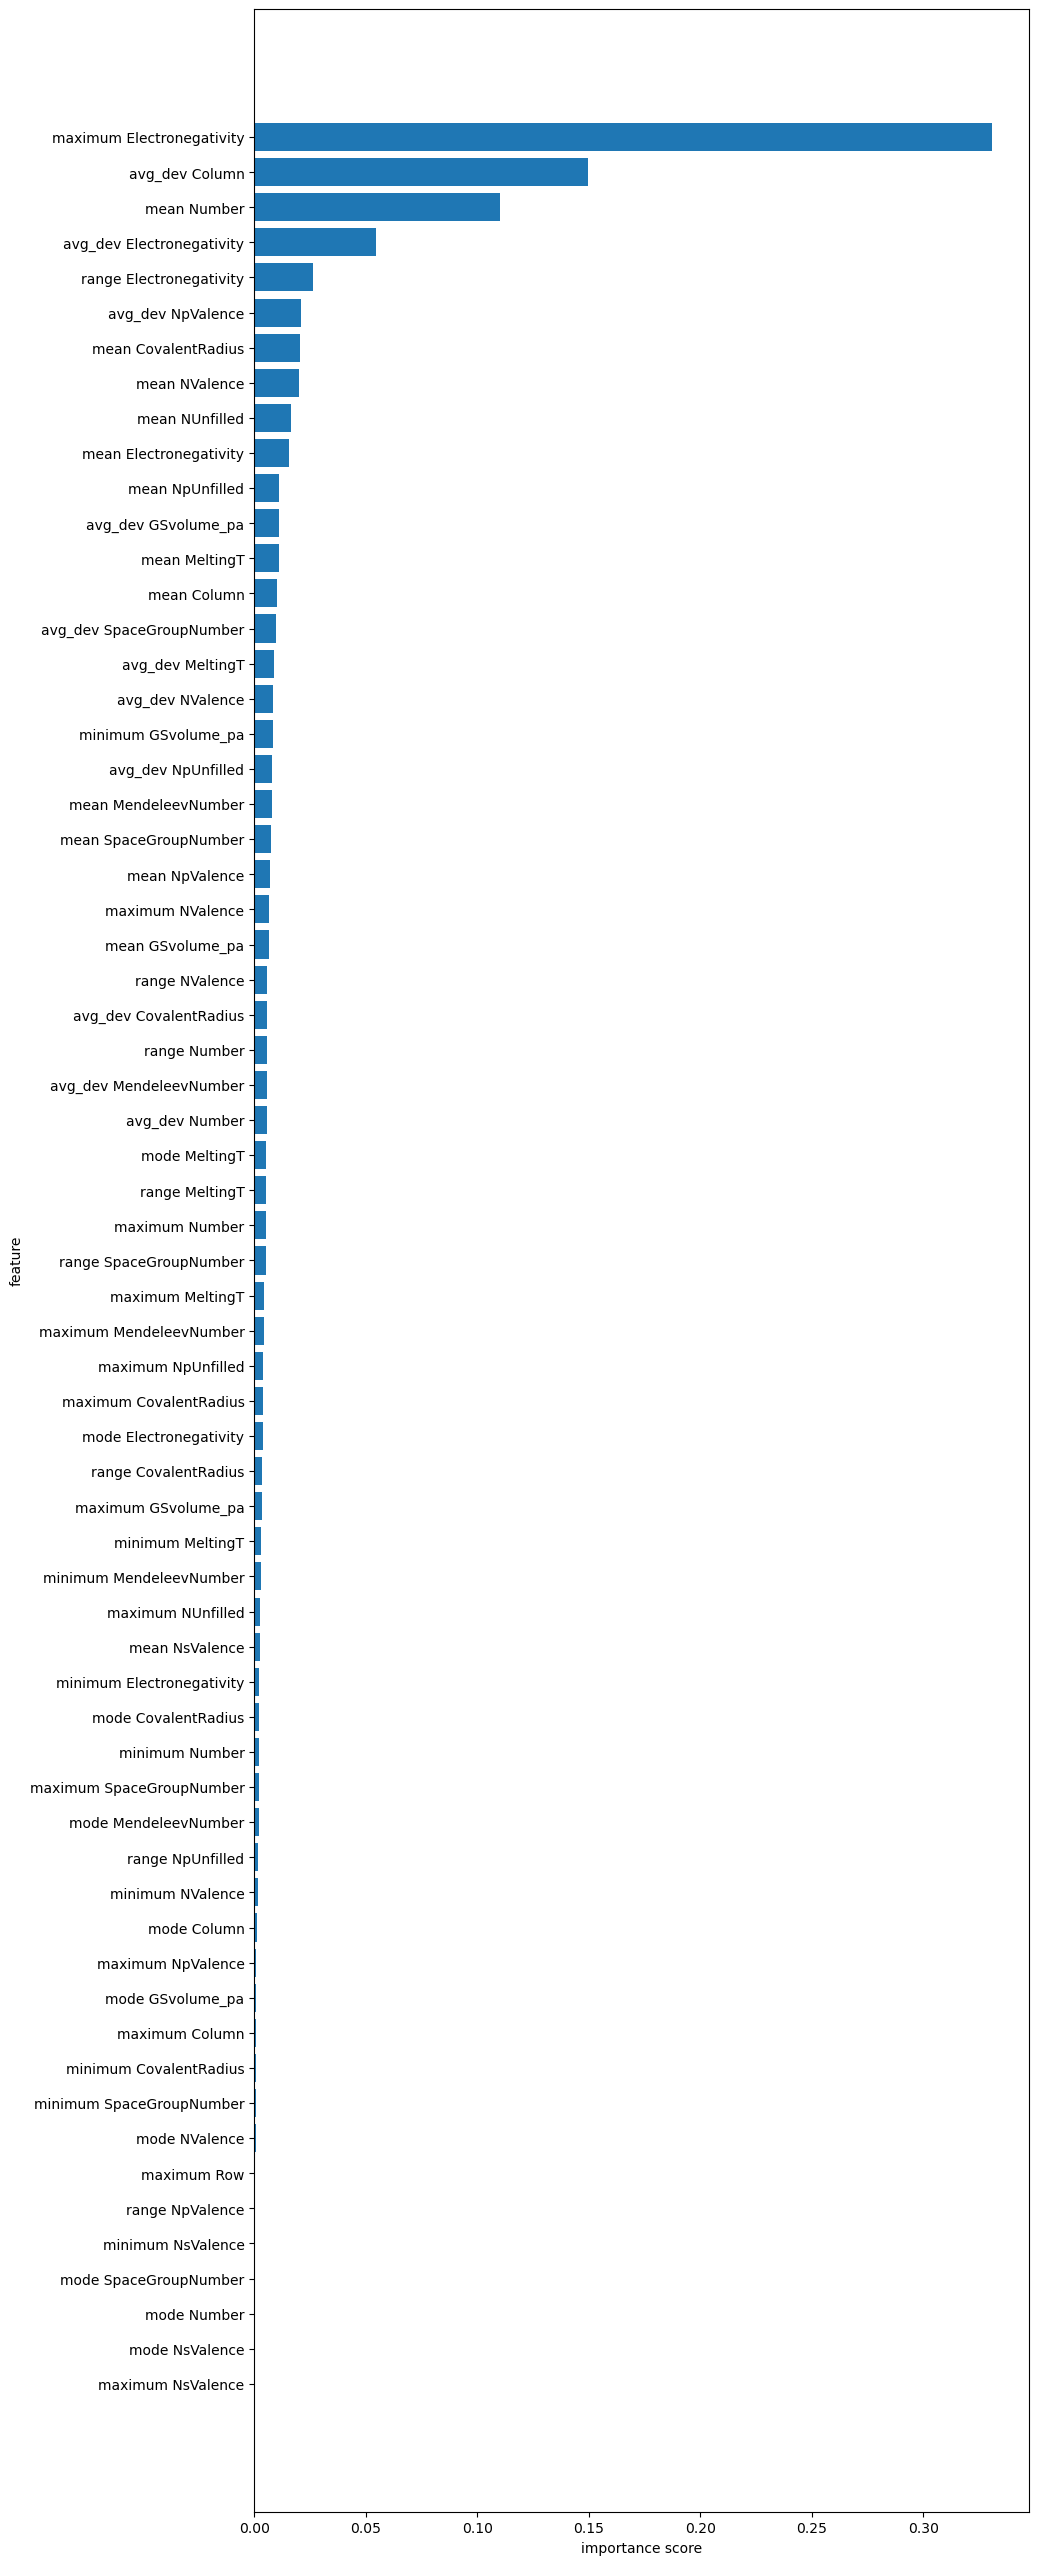

In [17]:
rf.fit(X,y)
features = np.array([s[11:] for s in X.columns])
importances = rf.feature_importances_
importances_sorted = sorted(importances, reverse=False)
indices_sorted = np.argsort(importances)
features_sorted = features[indices_sorted]
num_features=len(features_sorted)

yvals = np.arange(len(indices_sorted))
fig, ax = plt.subplots(figsize=(10, num_features/2))
ax.barh(yvals, importances_sorted)
ax.set_yticks(yvals)
ax.set_yticklabels(features_sorted)
ax.set_ylabel('feature')
ax.set_xlabel('importance score')
plt.show()

In [18]:
scores = cross_val_score(rf, X, y, scoring='neg_mean_squared_error', cv=kfold)

In [19]:
rmse_score = [np.sqrt(abs(s)) for s in scores]
print('Mean RMSE: {:.3f}'.format(np.mean(rmse_score)))

Mean RMSE: 0.481


In [20]:
bg_data_cleaned["band_gap predicted"] = y_hat
bg_data_cleaned['percentage_error'] = (bg_data_cleaned["gap expt"] - bg_data_cleaned['band_gap predicted']).abs()/bg_data_cleaned['gap expt'] * 100
display(bg_data_cleaned)

,formula,gap expt,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,...,MagpieData avg_dev GSvolume_pa,MagpieData mode GSvolume_pa,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,band_gap predicted,percentage_error
0,Hg0.7Cd0.3Te,0.35,"(Hg, Cd, Te)",48.0,80.0,32.0,61.20,13.1600,52.0,70.0,...,5.624261,34.763333,152.0,194.0,42.0,163.200,11.200,152.0,0.246985,29.432857
1,CuBr,3.08,"(Cu, Br)",29.0,35.0,6.0,32.00,3.0000,29.0,64.0,...,9.205000,11.070000,64.0,225.0,161.0,144.500,80.500,64.0,2.993351,2.813287
2,LuP,1.30,"(Lu, P)",15.0,71.0,56.0,43.00,28.0000,15.0,41.0,...,3.147381,22.570238,2.0,194.0,192.0,98.000,96.000,2.0,0.999690,23.100769
3,Cu3SbSe4,0.40,"(Cu, Sb, Se)",29.0,51.0,22.0,34.25,4.1875,34.0,64.0,...,7.489688,25.920000,14.0,225.0,211.0,112.125,98.125,14.0,0.529414,32.353571
4,ZnO,3.44,"(Zn, O)",8.0,30.0,22.0,19.00,11.0000,8.0,69.0,...,2.427500,9.105000,12.0,194.0,182.0,103.000,91.000,12.0,3.405676,0.997779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3891,ZnTe,2.25,"(Zn, Te)",30.0,52.0,22.0,41.00,11.0000,30.0,69.0,...,10.401667,13.960000,152.0,194.0,42.0,173.000,21.000,152.0,2.294831,1.992510
3892,ZnTe,2.29,"(Zn, Te)",30.0,52.0,22.0,41.00,11.0000,30.0,69.0,...,10.401667,13.960000,152.0,194.0,42.0,173.000,21.000,152.0,2.283830,0.269445
3893,ZnSe,2.76,"(Zn, Se)",30.0,34.0,4.0,32.00,2.0000,30.0,69.0,...,5.980000,13.960000,14.0,194.0,180.0,104.000,90.000,14.0,2.765703,0.206632
3894,ZnSnP2,1.66,"(Zn, Sn, P)",15.0,50.0,35.0,27.50,12.5000,15.0,69.0,...,5.094315,22.570238,2.0,194.0,192.0,84.750,82.750,2.0,1.615987,2.651391


In [21]:
import plotly.express as px
import plotly.graph_objects as go 

refrence_line = go.Scatter(
    x=[0, 12],
    y=[0,12] ,
    line=dict(color='black', dash='dash'),
    mode="lines",
    showlegend=False
)

fig = px.scatter(
    bg_data_cleaned,
    x="gap expt",
    y="band_gap predicted",
    hover_name="formula",
    color='percentage_error',
    color_continuous_scale=px.colors.sequential.Bluered
)

fig.add_trace(refrence_line)
fig.show()

In [24]:
fig.show(renderer = "firefox")   

In [25]:
import plotly.io as pio 
pio.write_html(fig, file='index.html',auto_open=True)

/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/ash/snap/code/common/.cache/gio-modules/libgiolibproxy.so
/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/ash/snap/code/common/.cache/gio-modules/libgiolibproxy.so
MESA-INTEL: warning: Haswell Vulkan support is incomplete
libva error: vaGetDriverNameByIndex() failed with unknown libva error, driver_name = (null)


Opening in existing browser session.
